In [107]:
# Importing data preprocessing and model selection tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Importing various linear models from sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Importing tools for model evaluation and improvement
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importing utilities for statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula import api
# Configuring Matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
plt.rcParams['figure.figsize'] = [10, 6]

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [108]:
# Loading the dataset
import pandas as pd
song_data = pd.read_csv('song_data.csv')

# Removing the 'song_name' column and displaying the first few rows
song_data = song_data.drop(columns=['song_name'])
print(song_data.head())

# Defining the target variable and feature list
popularity_target = 'song_popularity'
feature_list = song_data.columns.difference([popularity_target])

# Creating a copy of the original dataframe
original_df = song_data.copy()

# Displaying dataset information
num_features = song_data.shape[1]
num_samples = song_data.shape[0]
print(f"\n\033[1mInsight:\033[0m The Dataset contains {num_features} features and {num_samples} samples.")


   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256      

In [109]:
#Checking the dtypes of all the columns

song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [110]:
song_data.info()
song_data.nunique().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

In [111]:
nu = song_data[feature_list].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(song_data[feature_list].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 10 numerical & 3 categorical features.


# <center> 2. Exploratory Data Analysis (EDA)

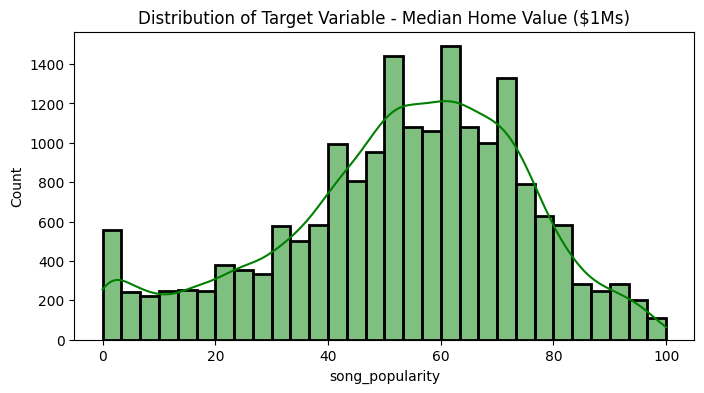

                                 Categorical Features Visualization                                 


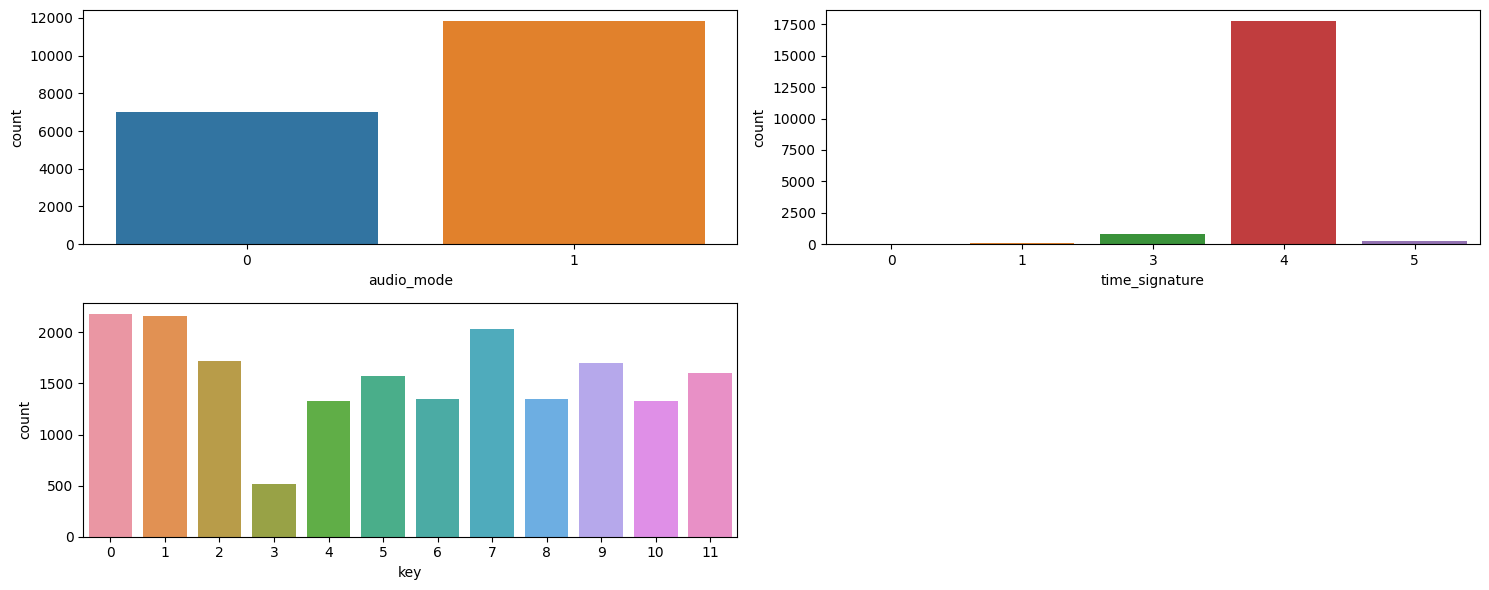

In [112]:
plt.figure(figsize=(8, 4))
sns.histplot(song_data[popularity_target], color='green', kde=True, edgecolor='black', linewidth=2, bins=30)
plt.title('Distribution of Target Variable - Median Home Value ($1Ms)')
plt.show()

# Visualizing Categorical Features
print('Categorical Features Visualization'.center(100))

cols_per_row = 2
fig_size_height = 3 * math.ceil(len(cf) / cols_per_row)
plt.figure(figsize=(15, fig_size_height))

for index, feature in enumerate(cf):
    plt.subplot(math.ceil(len(cf) / cols_per_row), cols_per_row, index + 1)
    unique_values = song_data[feature].nunique()
    if unique_values <= 8:
        sns.countplot(x=song_data[feature])
    else:
        sns.countplot(x=song_data[feature])

plt.tight_layout()
plt.show()

**Inference:**The Target Variable seems to be be normally distributed, averaging around 60 units.

                                   Numeric Features Distribution                                    


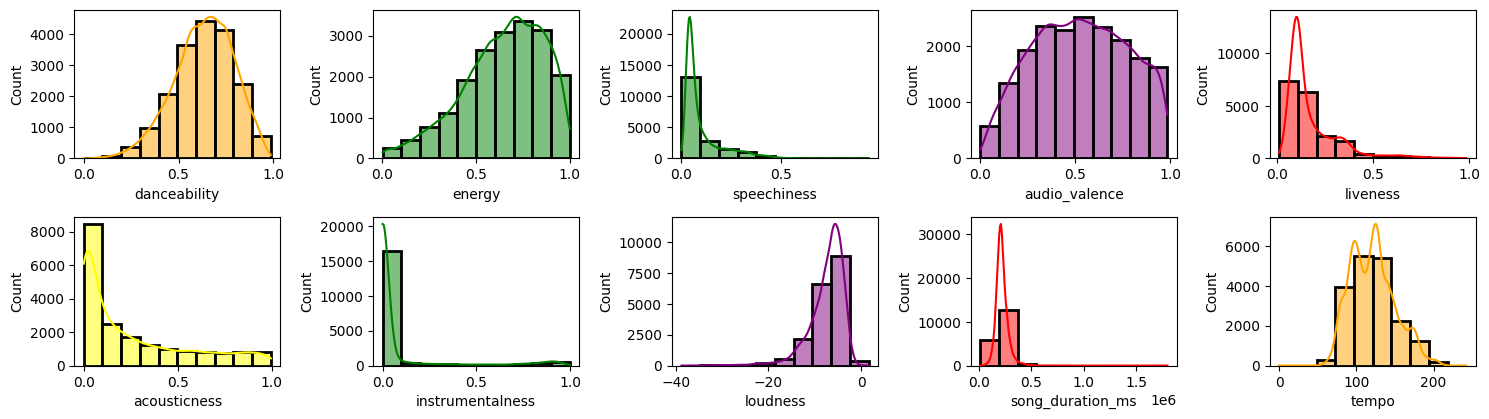

In [113]:
# Distribution of Numeric Features
print('Numeric Features Distribution'.center(100))

colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']
num_cols = 5

fig_size_height = 4 * math.ceil(len(nf) / num_cols)
plt.figure(figsize=(15, fig_size_height))

for i, feature in enumerate(nf):
    plt.subplot(math.ceil(len(nf) / 3), num_cols, i + 1)
    random_color = np.random.choice(colors)
    sns.histplot(song_data[feature], kde=True, edgecolor='black', linewidth=2, bins=10, color=random_color)

plt.tight_layout()
plt.show()

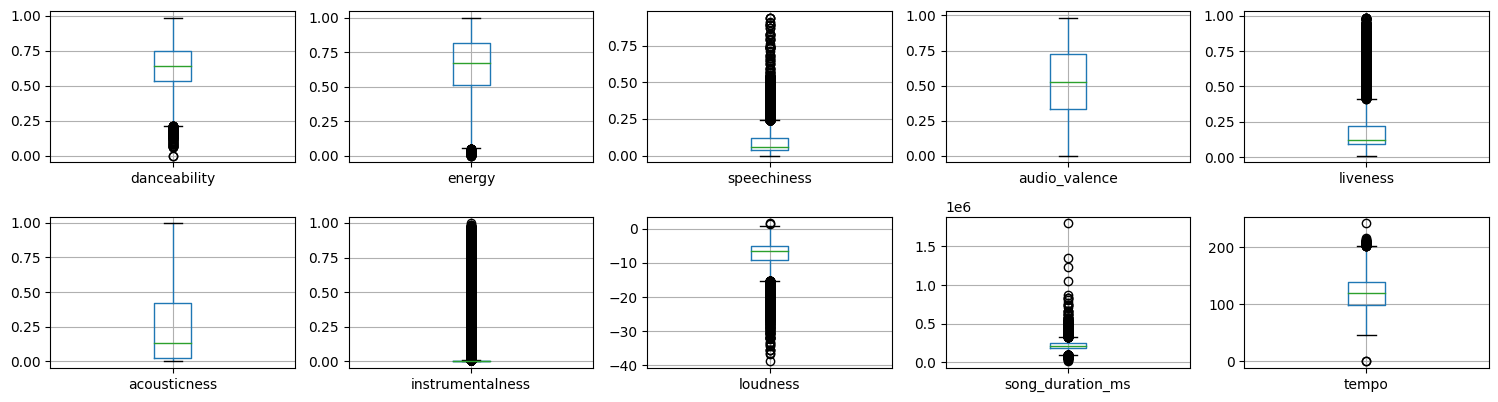

In [114]:
# Boxplot for Numeric Features
plt.figure(figsize=(15, fig_size_height))
for i, feature in enumerate(nf):
    plt.subplot(math.ceil(len(nf) / 3), num_cols, i + 1)
    song_data.boxplot(column=feature)

plt.tight_layout()
plt.show()

# <center> 3. Data Preprocessing

In [115]:
# Counting initial rows and columns
initial_rows, initial_cols = song_data.shape

# Removing duplicate rows from the dataframe
song_data.drop_duplicates(inplace=True)

# Checking for duplicates and printing the result
if song_data.shape == (initial_rows, initial_cols):
    print('\n\033[1mInsight:\033[0m No duplicates in the dataset.')
else:
    duplicates_removed = initial_rows - song_data.shape[0]
    print(f'\n\033[1mInsight:\033[0m Duplicates removed/fixed: {duplicates_removed}')

# Calculating null values and their percentages
null_value_stats = pd.DataFrame(song_data.isnull().sum().sort_values(ascending=False), columns=['Null Values Count'])
null_value_stats['Percentage'] = (null_value_stats['Null Values Count'] / len(song_data)) * 100
print(null_value_stats)

# Creating a copy for further preprocessing
processed_df = song_data.copy()

# Identifying columns for encoding
excluded_categorical_cols = null_value_stats[null_value_stats['Percentage'] > 0].index.values
included_categorical_cols = [col for col in cf if col not in excluded_categorical_cols]

# Applying One-Hot and Dummy Encoding
one_hot_encoded = False
dummy_encoded = False
for col in included_categorical_cols:
    unique_values = processed_df[col].nunique()
    if unique_values == 2:
        if not one_hot_encoded:
            print("\033[1mApplying One-Hot Encoding to:\033[0m")
            one_hot_encoded = True
        print(col)
        processed_df = pd.get_dummies(processed_df, columns=[col], drop_first=True, prefix=str(col))
    elif 2 < unique_values < 17:
        if not dummy_encoded:
            print("\n\033[1mApplying Dummy Encoding to:\033[0m")
            dummy_encoded = True
        print(col)
        processed_df = pd.get_dummies(processed_df, columns=[col], drop_first=True, prefix=str(col))


# Copy for outlier removal
df_for_outliers = processed_df.copy()

# Removing outliers from numerical features
numeric_features = nf
for feature in numeric_features:
    lower_quartile = df_for_outliers[feature].quantile(0.25)
    upper_quartile = df_for_outliers[feature].quantile(0.75)
    IQR = upper_quartile - lower_quartile
    filter_condition = ((df_for_outliers[feature] >= (lower_quartile - 1.5 * IQR)) & 
                        (df_for_outliers[feature] <= (upper_quartile + 1.5 * IQR)))
    df_for_outliers = df_for_outliers[filter_condition]

df_for_outliers = df_for_outliers.reset_index(drop=True)
display(df_for_outliers.head())

# Displaying information about outliers removal
print('\n\033[1mOutliers Analysis:\033[0m')
print(f'Before outlier removal: {processed_df.shape[0]} samples.')
print(f'After outlier removal: {df_for_outliers.shape[0]} samples.')



Insight: Duplicates removed/fixed: 3911
                  Null Values Count  Percentage
song_popularity                   0         0.0
song_duration_ms                  0         0.0
acousticness                      0         0.0
danceability                      0         0.0
energy                            0         0.0
instrumentalness                  0         0.0
key                               0         0.0
liveness                          0         0.0
loudness                          0         0.0
audio_mode                        0         0.0
speechiness                       0         0.0
tempo                             0         0.0
time_signature                    0         0.0
audio_valence                     0         0.0
Applying One-Hot Encoding to:
audio_mode

Applying Dummy Encoding to:
time_signature
key


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,...,False,False,False,False,False,False,True,False,False,False
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,...,False,True,False,False,False,False,False,False,False,False
2,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,...,False,False,False,False,False,False,False,False,False,False
3,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,...,False,False,False,False,False,False,False,False,True,False
4,80,235893,0.008950,0.316,0.945,0.000002,0.3960,-3.169,0.1240,189.931,...,False,False,True,False,False,False,False,False,False,False



Outliers Analysis:
Before outlier removal: 14924 samples.
After outlier removal: 8950 samples.


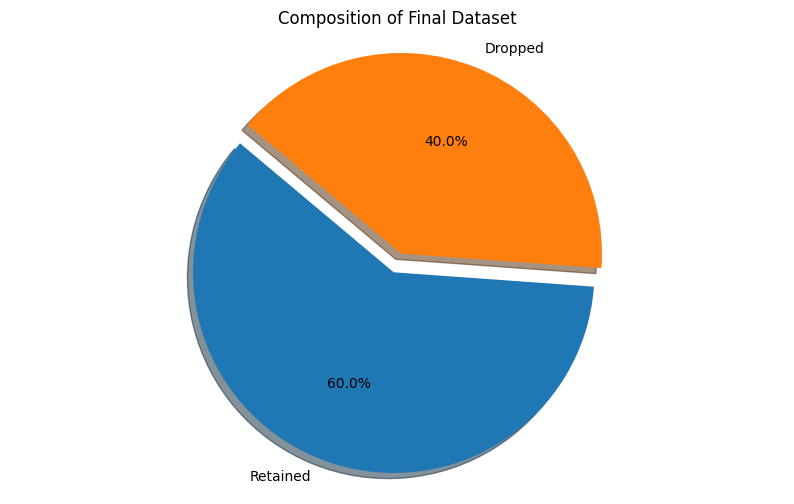


Insight: Post-cleanup, 5974 samples were dropped, retaining 59.97% of the original data.


In [116]:
# Copying the preprocessed dataframe
cleaned_df = df_for_outliers.copy()

# Renaming columns to replace hyphens with underscores
cleaned_df.rename(columns=lambda x: x.replace('-', '_'), inplace=True)

# Plotting the final dataset's composition
labels = ['Retained', 'Dropped']
sizes = [cleaned_df.shape[0], song_data.shape[0] - cleaned_df.shape[0]]
explode_values = (0, 0.1)  # Only "explode" the second slice (i.e., 'Dropped')

plt.title('Composition of Final Dataset')
plt.pie(sizes, explode=explode_values, labels=labels, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Printing the inference from the cleanup process
dropped_samples = song_data.shape[0] - cleaned_df.shape[0]
retained_percentage = round((cleaned_df.shape[0] / song_data.shape[0]) * 100, 2)
print(f'\n\033[1mInsight:\033[0m Post-cleanup, {dropped_samples} samples were dropped, retaining {retained_percentage}% of the original data.')


# <center> 4. Data Manipulation

In [117]:
# Adjusting column names to replace spaces with underscores
column_names = [col.replace(' ', '_') for col in cleaned_df.columns]
cleaned_df.columns = column_names

# Separating features and target variable
features_X = cleaned_df.drop(columns=[popularity_target])
target_Y = cleaned_df[popularity_target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_X, target_Y, train_size=0.8, test_size=0.2, random_state=100)
X_train.reset_index(drop=True, inplace=True)

# Displaying dimensions of the original, training, and testing sets
print(f'Original dataset dimensions: {features_X.shape}, {target_Y.shape}')
print(f'Training set dimensions: {X_train.shape}, {y_train.shape}')
print(f'Testing set dimensions: {X_test.shape}, {y_test.shape}')

# Applying standard scaling to the training and testing sets
scaler = StandardScaler()

# Standardization of the training set
print('Applying Standardization to Training Set'.center(120))
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features_X.columns)
display(X_train_scaled.describe())

# Standardization of the testing set
print('\nApplying Standardization to Testing Set'.center(120))
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features_X.columns)
display(X_test_scaled.describe())

# Combining scaled training data and target for regression analysis
train_data_combined = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis=1)



Original dataset dimensions: (8950, 26), (8950,)
Training set dimensions: (7160, 26), (7160,)
Testing set dimensions: (1790, 26), (1790,)
                                        Applying Standardization to Training Set                                        


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,...,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03
mean,-2.143537e-16,-9.551639e-17,-4.381349e-16,-1.359558e-16,-2.480945e-18,-8.782546e-17,-9.824543e-17,1.081692e-16,-1.429024e-16,-7.939025e-18,...,-5.656555e-17,-1.587805e-17,-9.824543e-17,-2.927515e-17,-1.389329e-17,7.591693e-17,4.465702e-17,5.185176e-17,-7.939025e-17,-2.431326e-17
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,...,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,-2.625387e+00,-9.181177e-01,-2.918774e+00,-3.131156e+00,-3.425841e-01,-1.575563e+00,-2.825473e+00,-9.812680e-01,-2.528553e+00,-2.142539e+00,...,-3.215677e-01,-1.695159e-01,-2.772249e-01,-3.073541e-01,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01
25%,-6.702830e-01,-8.223387e-01,-6.452384e-01,-6.864460e-01,-3.425841e-01,-6.881147e-01,-5.876500e-01,-6.975836e-01,-7.615380e-01,-8.000859e-01,...,-3.215677e-01,-1.695159e-01,-2.772249e-01,-3.073541e-01,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01
50%,-6.177447e-02,-4.150227e-01,5.798743e-02,1.271097e-01,-3.411082e-01,-3.751120e-01,1.864114e-01,-4.002151e-01,-1.426259e-02,-6.808681e-03,...,-3.215677e-01,-1.695159e-01,-2.772249e-01,-3.073541e-01,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01
75%,6.146981e-01,5.921024e-01,7.219555e-01,8.042306e-01,-2.673929e-01,4.767485e-01,7.447833e-01,2.966273e-01,6.418977e-01,8.186145e-01,...,-3.215677e-01,-1.695159e-01,-2.772249e-01,-3.073541e-01,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01
max,2.716562e+00,2.672887e+00,2.386143e+00,1.703690e+00,6.650948e+00,2.864200e+00,2.376364e+00,3.368207e+00,2.773299e+00,1.801656e+00,...,3.109765e+00,5.899152e+00,3.607179e+00,3.253577e+00,3.569706e+00,2.774865e+00,3.540476e+00,3.086975e+00,3.743058e+00,3.361905e+00


                                        
Applying Standardization to Testing Set                                        


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,...,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000
mean,0.036125,-0.014032,0.006938,0.028758,0.010602,-0.058353,0.026948,-0.023773,-0.005688,0.019511,...,-0.012939,0.006781,-0.001628,0.024867,-0.058608,-0.015326,0.025095,0.036205,-0.022964,-0.003066
std,0.971755,0.975985,0.990170,0.974326,1.002490,0.982153,0.979911,0.968979,1.002542,1.021243,...,0.981985,1.019502,0.997564,1.035975,0.896783,0.981478,1.040064,1.048494,0.959254,0.995564
min,-2.491247,-0.918115,-2.932429,-2.934083,-0.342584,-1.543058,-2.781757,-0.972847,-2.236695,-2.116408,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
25%,-0.613785,-0.815321,-0.624756,-0.610649,-0.342584,-0.734631,-0.562450,-0.703373,-0.755222,-0.803197,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
50%,-0.024516,-0.425960,0.064815,0.149849,-0.341076,-0.425551,0.223624,-0.412847,-0.021330,0.026374,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
75%,0.611647,0.586634,0.733904,0.809284,-0.262995,0.373068,0.727351,0.323469,0.580851,0.888091,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
max,2.685640,2.669241,2.345178,1.693583,6.608043,2.852991,2.786427,3.368207,2.675691,1.768473,...,3.109765,5.899152,3.607179,3.253577,3.569706,2.774865,3.540476,3.086975,3.743058,3.361905


# <center> 5. Feature Selection/Extraction

                                    Correlation Matrix Overview                                     


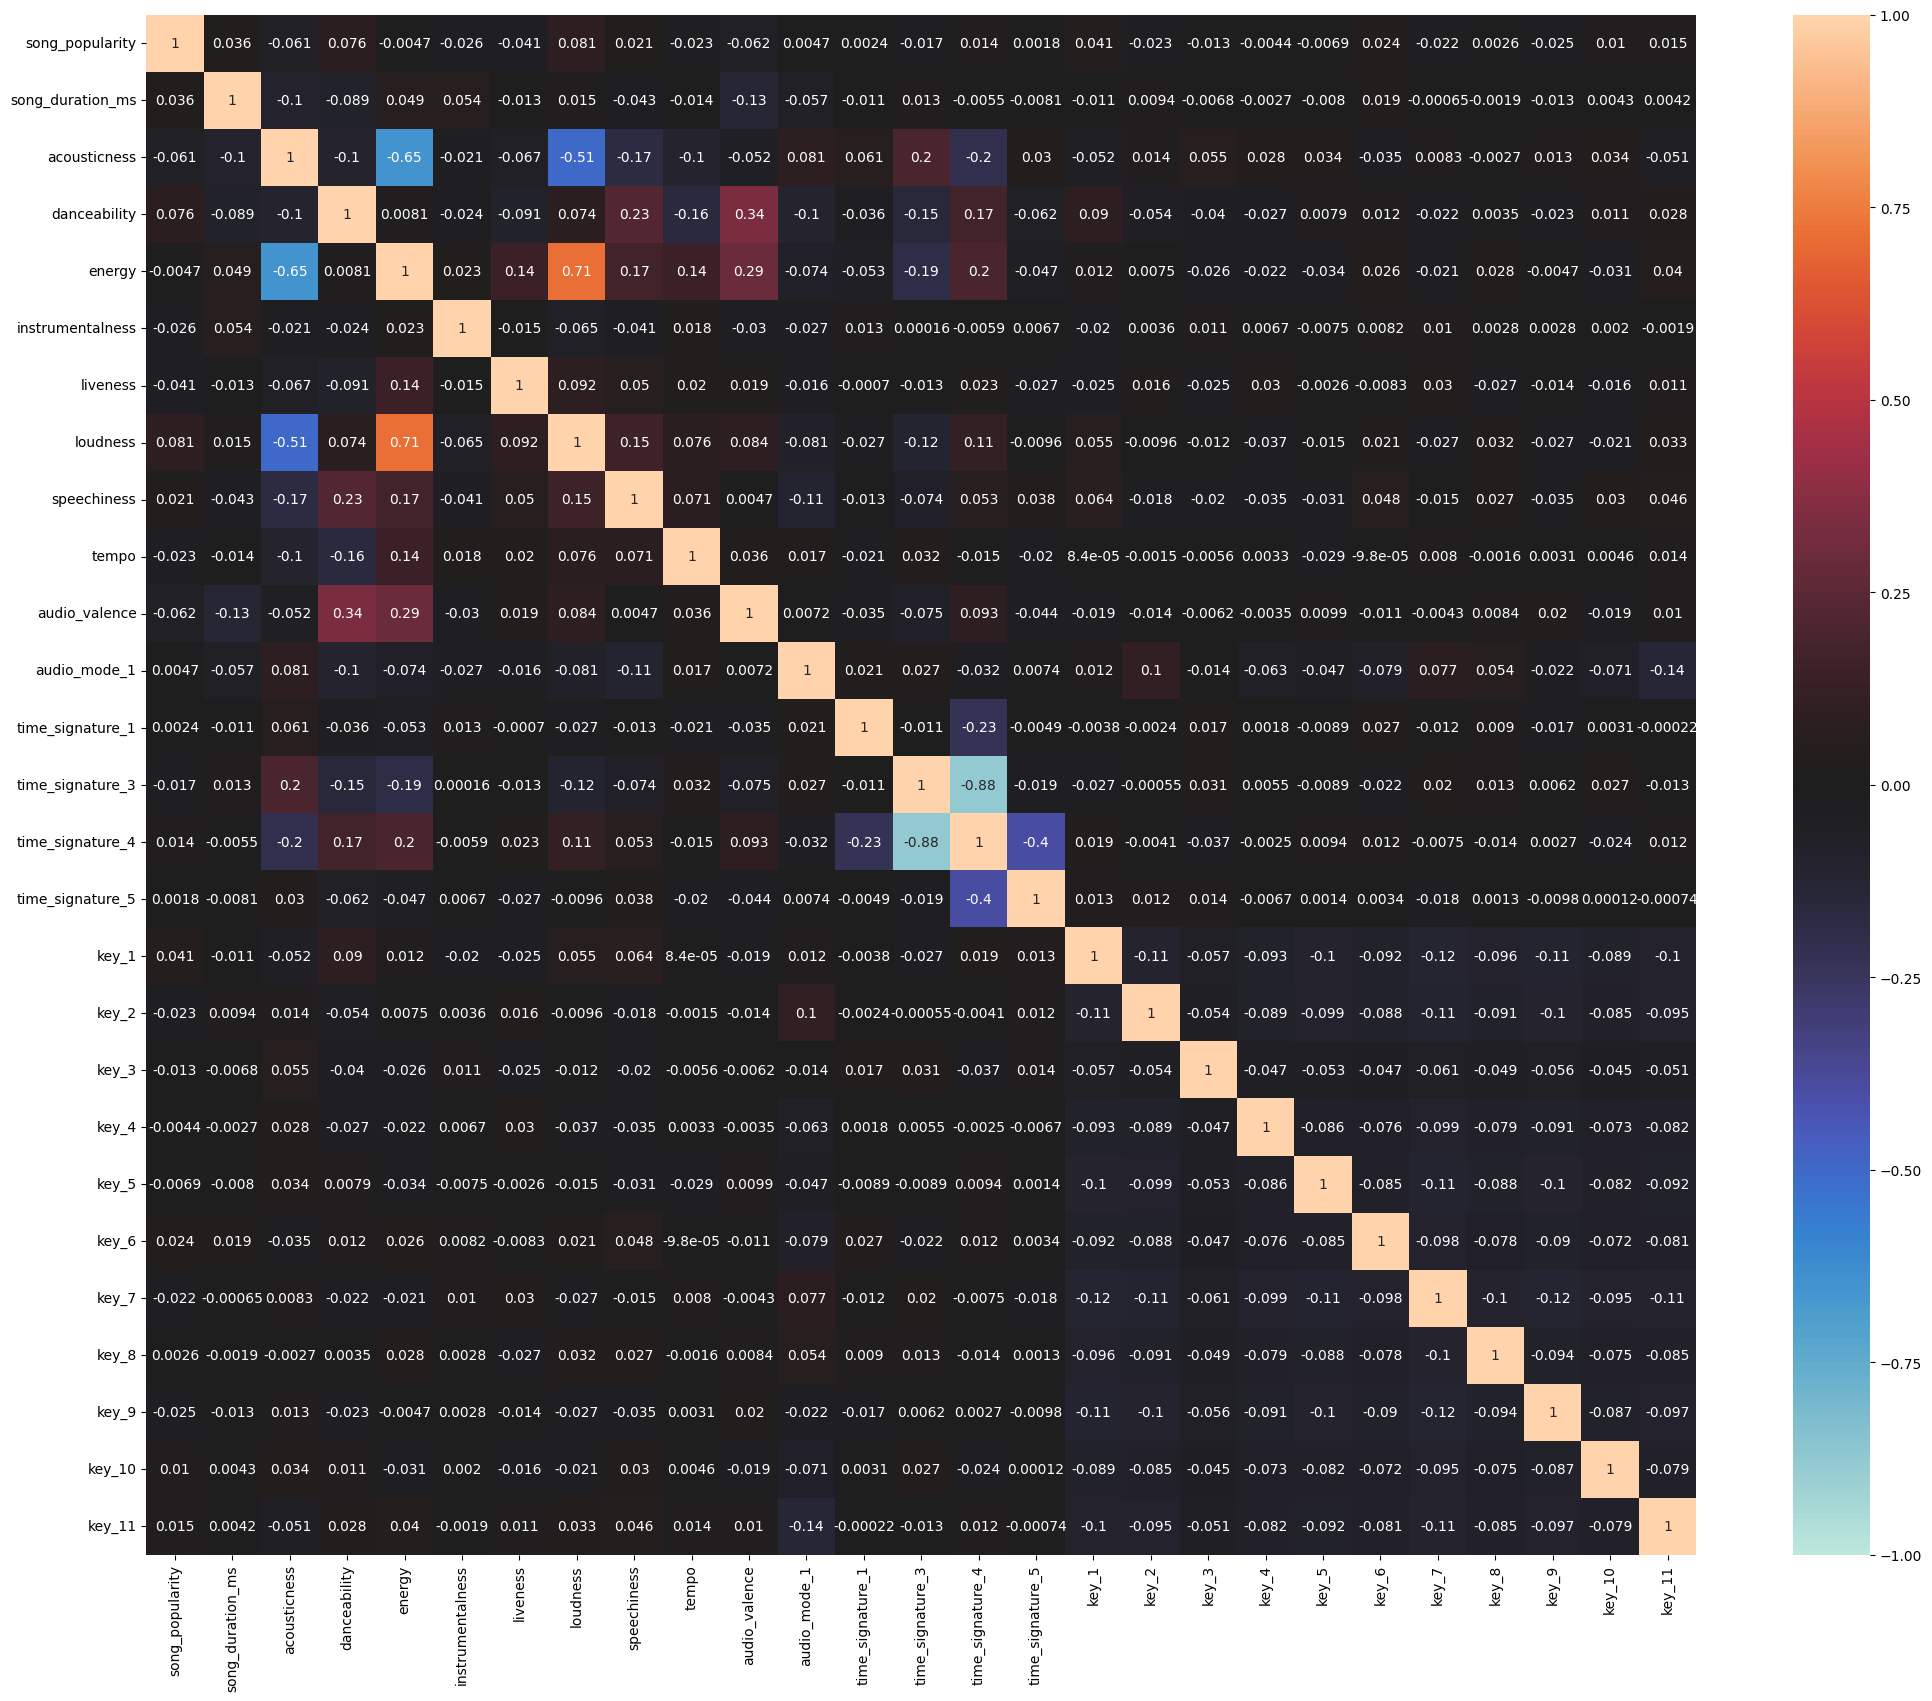

In [118]:
# Displaying the correlation matrix
print('Correlation Matrix Overview'.center(100))
plt.figure(figsize=(25, 20))
sns.heatmap(cleaned_df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

# Model Creation, Evaluation, Comparison

In [119]:
# Initialize a DataFrame to hold model evaluation metrics
evaluation_metrics_df = pd.DataFrame(np.zeros([5, 8]), columns=['Train-R2', 'Test-R2', 'Train-RSS', 'Test-RSS',
                                                               'Train-MSE', 'Test-MSE', 'Train-RMSE', 'Test-RMSE'])

# Randomly choosing features for visualization
random_cols = np.random.choice(X_train_scaled.loc[:, X_train_scaled.nunique() >= 50].columns.values, 3, replace=False)

def evaluate_model(model_index, train_predictions, test_predictions):
    # Visualizing actual vs predicted values
    plt.figure(figsize=[15, 6])
    for index, feature in enumerate(random_cols):
        plt.subplot(2, 3, index + 1)
        plt.scatter(y_train, X_train_scaled[feature], label='Actual')
        plt.scatter(train_predictions, X_train_scaled[feature], label='Prediction')
        plt.legend()
    plt.show()

    # Model Evaluation Metrics
    print('\n\n' + '-'*20 + 'Training Set Metrics' + '-'*20)
    print('\nR2-Score on Training set --->', round(r2_score(y_train, train_predictions), 20))
    print('RSS on Training set  --->', round(np.sum(np.square(y_train - train_predictions)), 20))
    print('MSE on Training set  --->', round(mean_squared_error(y_train, train_predictions), 20))
    print('RMSE on Training set --->', round(np.sqrt(mean_squared_error(y_train, train_predictions)), 20))

    print('\n' + '-'*20 + 'Testing Set Metrics' + '-'*20)
    print('\nR2-Score on Testing set --->', round(r2_score(y_test, test_predictions), 20))
    print('RSS on Testing set  --->', round(np.sum(np.square(y_test - test_predictions)), 20))
    print('MSE on Testing set  --->', round(mean_squared_error(y_test, test_predictions), 20))
    print('RMSE on Testing set --->', round(np.sqrt(mean_squared_error(y_test, test_predictions)), 20))

    # Updating the evaluation metrics DataFrame
    evaluation_metrics_df.loc[model_index] = [
        round(r2_score(y_train, train_predictions), 20),
        round(r2_score(y_test, test_predictions), 20),
        round(np.sum(np.square(y_train - train_predictions)), 20),
        round(np.sum(np.square(y_test - test_predictions)), 20),
        round(mean_squared_error(y_train, train_predictions), 20),
        round(mean_squared_error(y_test, test_predictions), 20),
        round(np.sqrt(mean_squared_error(y_train, train_predictions)), 20),
        round(np.sqrt(mean_squared_error(y_test, test_predictions)), 20)
    ]

    # Visualizing error terms and prediction accuracy
    plt.figure(figsize=[15, 4])

    plt.subplot(1, 2, 1)
    sns.histplot(y_train - train_predictions, kde=True)
    plt.title('Error Terms')
    plt.xlabel('Errors')

    plt.subplot(1, 2, 2)
    plt.scatter(y_train, train_predictions)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()


---

## Multiple Linear Regression(MLR)

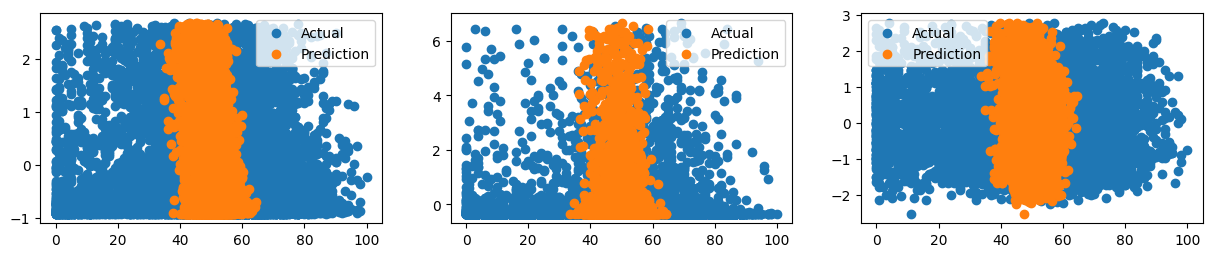



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.037161929285306816
RSS on Training set  ---> 2947003.115153175
MSE on Training set  ---> 411.5926138482088
RMSE on Training set ---> 20.28774541067116

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.0033856913209441286
RSS on Testing set  ---> 745140.1373622435
MSE on Testing set  ---> 416.279406347622
RMSE on Testing set ---> 20.4029264162674


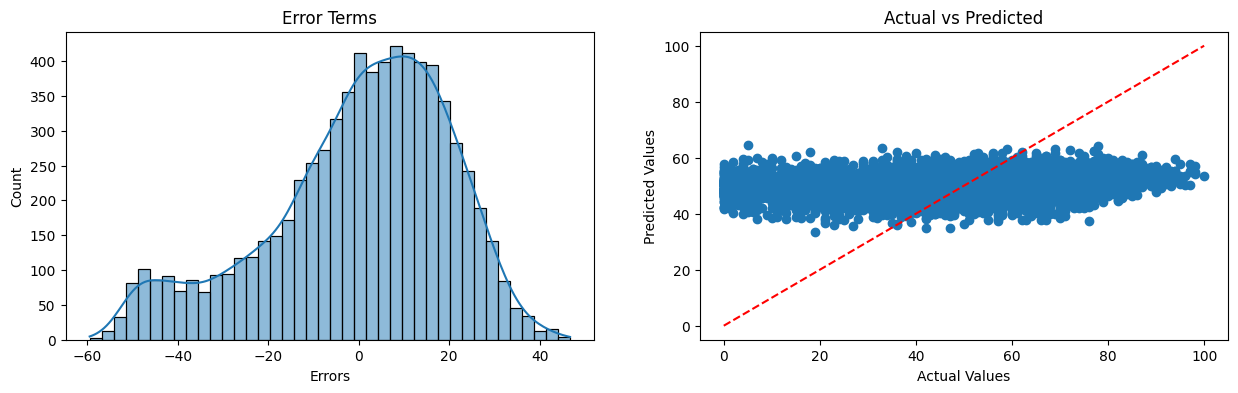

In [120]:
#Linear Regression

MLR = LinearRegression().fit(X_train_scaled,y_train)
pred1 = MLR.predict(X_train_scaled)
pred2 = MLR.predict(X_test_scaled)


evaluate_model(0, pred1, pred2)

---

## Ridge Regression Model

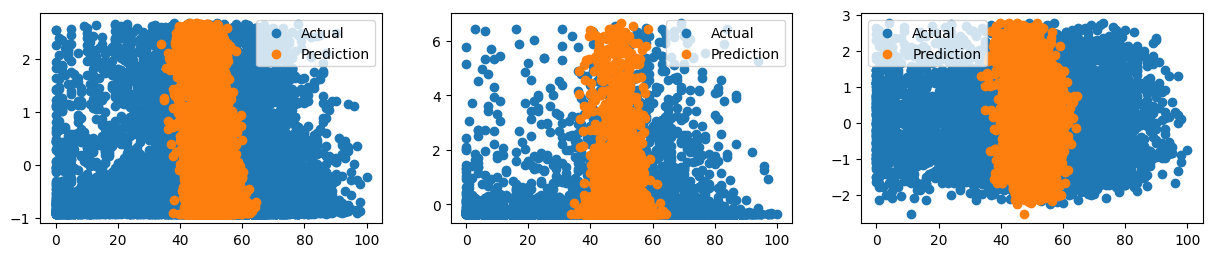



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.037189091772393934
RSS on Training set  ---> 2946919.977669837
MSE on Training set  ---> 411.5810024678543
RMSE on Training set ---> 20.28745924131098

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.0034207109152710746
RSS on Testing set  ---> 745113.9542088411
MSE on Testing set  ---> 416.2647788876207
RMSE on Testing set ---> 20.40256794836426


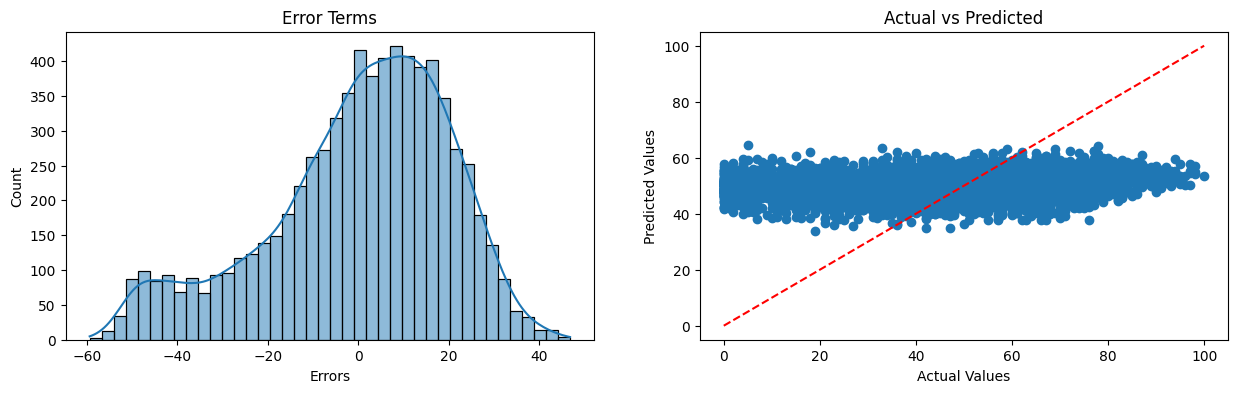

In [121]:
#Creating a Ridge Regression model

RLR = Ridge().fit(X_train_scaled,y_train)
pred1 = RLR.predict(X_train_scaled)
pred2 = RLR.predict(X_test_scaled)


evaluate_model(1, pred1, pred2)

---

## Lasso Regression Model

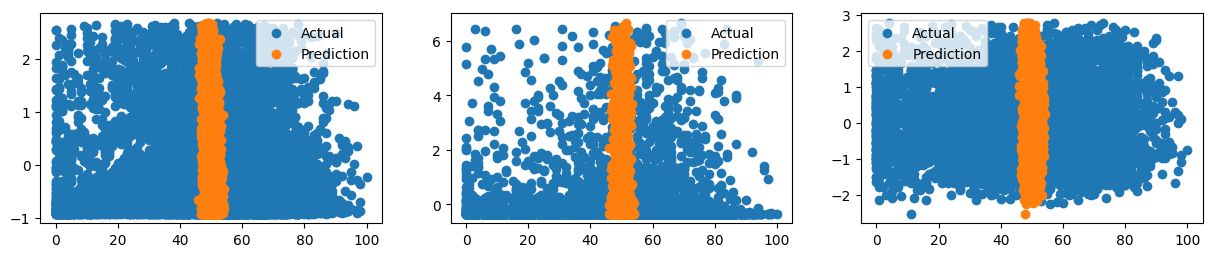



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.015140165780250903
RSS on Training set  ---> 3014406.1475264104
MSE on Training set  ---> 421.00644518525286
RMSE on Training set ---> 20.518441587636545

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.007117147140071945
RSS on Testing set  ---> 742350.234109388
MSE on Testing set  ---> 414.72080117842904
RMSE on Testing set ---> 20.364694968951266


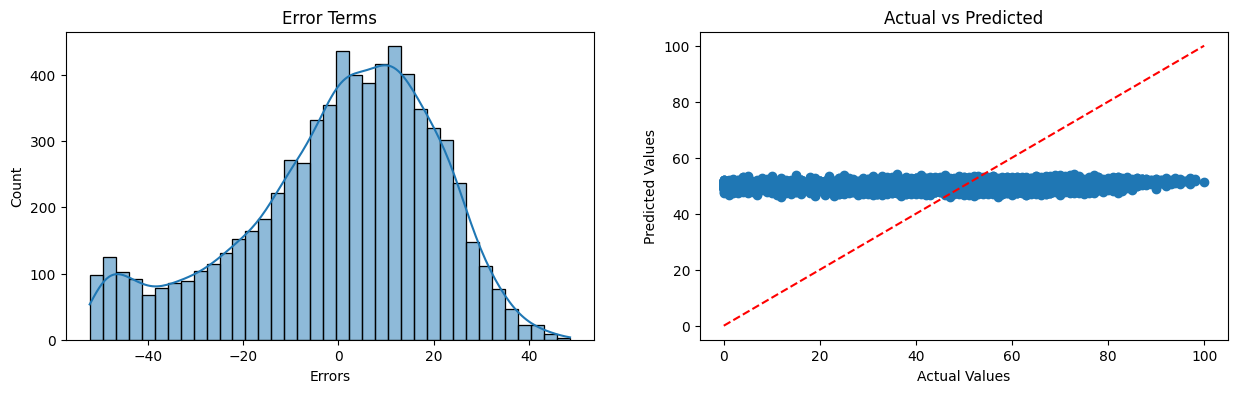

In [122]:
#Creating a Ridge Regression model

LLR = Lasso().fit(X_train_scaled,y_train)
pred1 = LLR.predict(X_train_scaled)
pred2 = LLR.predict(X_test_scaled)


evaluate_model(2, pred1, pred2)

---

## Elastic-Net Regression

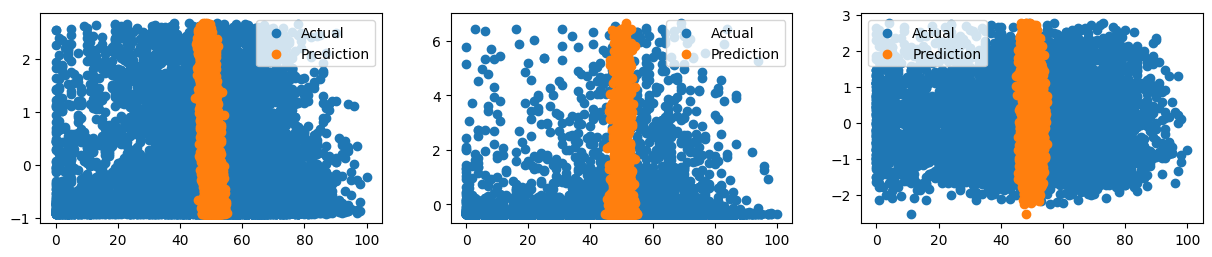



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.019205092299083182
RSS on Training set  ---> 3001964.4385015736
MSE on Training set  ---> 419.2687763270355
RMSE on Training set ---> 20.476053729345296

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.007624464892474702
RSS on Testing set  ---> 741970.9270731356
MSE on Testing set  ---> 414.50889780622094
RMSE on Testing set ---> 20.35949159007221


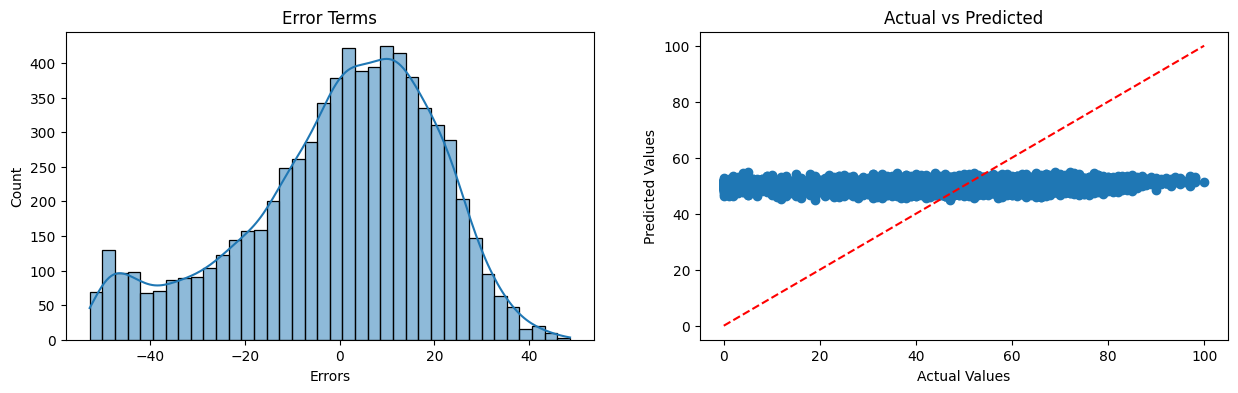

In [123]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(X_train_scaled,y_train)
pred1 = ENR.predict(X_train_scaled)
pred2 = ENR.predict(X_test_scaled)


evaluate_model(3, pred1, pred2)

---

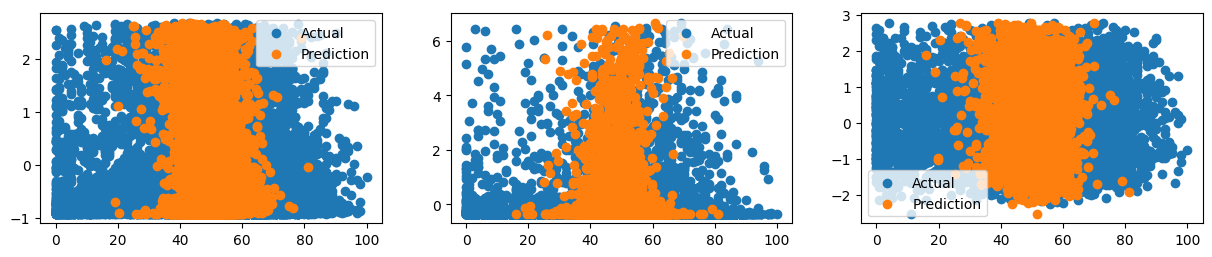



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.07763798640675434
RSS on Training set  ---> 2823116.170864108
MSE on Training set  ---> 394.2899679977804
RMSE on Training set ---> 19.85673608621972

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -5.443930015043534e+19
RSS on Testing set  ---> 4.070271441894689e+25
MSE on Testing set  ---> 2.2738946602763624e+22
RMSE on Testing set ---> 150794385183.14807


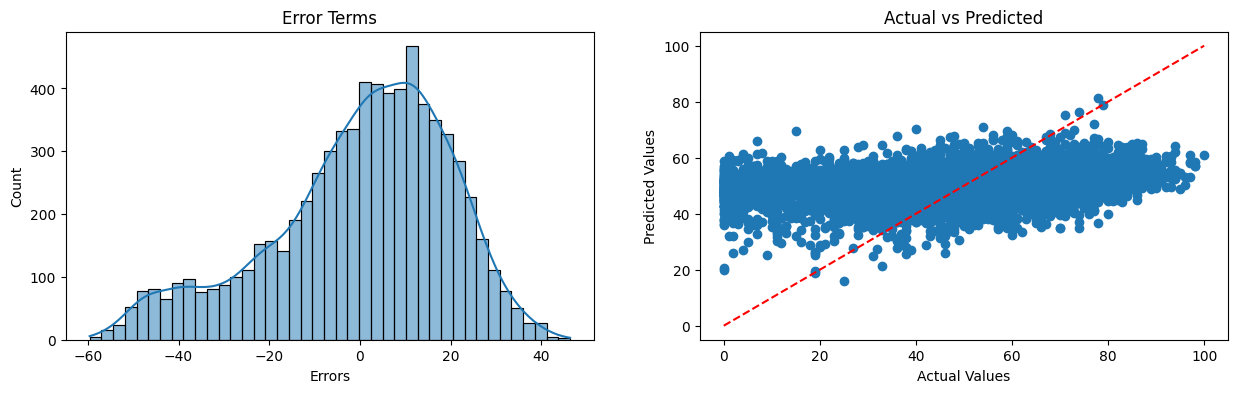

In [124]:
#Using the 2nd Order Polynomial Regression model (degree=2)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train_scaled)
X_poly1 = poly_reg.fit_transform(X_test_scaled)
PR = LinearRegression()
PR.fit(X_poly, y_train)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)


evaluate_model(4, pred1, pred2)

---

### Comparing the Evaluation Metics of the Models

In [125]:
# Regression Models Results Evaluation

EMC = evaluation_metrics_df.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.037162,3.385691e-03,2.947003e+06,7.451401e+05,411.592614,4.162794e+02,20.287745,2.040293e+01
Ridge Linear Regression (RLR),0.037189,3.420711e-03,2.946920e+06,7.451140e+05,411.581002,4.162648e+02,20.287459,2.040257e+01
Lasso Linear Regression (LLR),0.015140,7.117147e-03,3.014406e+06,7.423502e+05,421.006445,4.147208e+02,20.518442,2.036469e+01
Elastic-Net Regression (ENR),0.019205,7.624465e-03,3.001964e+06,7.419709e+05,419.268776,4.145089e+02,20.476054,2.035949e+01
Polynomial Regression (PNR),0.077638,-5.443930e+19,2.823116e+06,4.070271e+25,394.289968,2.273895e+22,19.856736,1.507944e+11


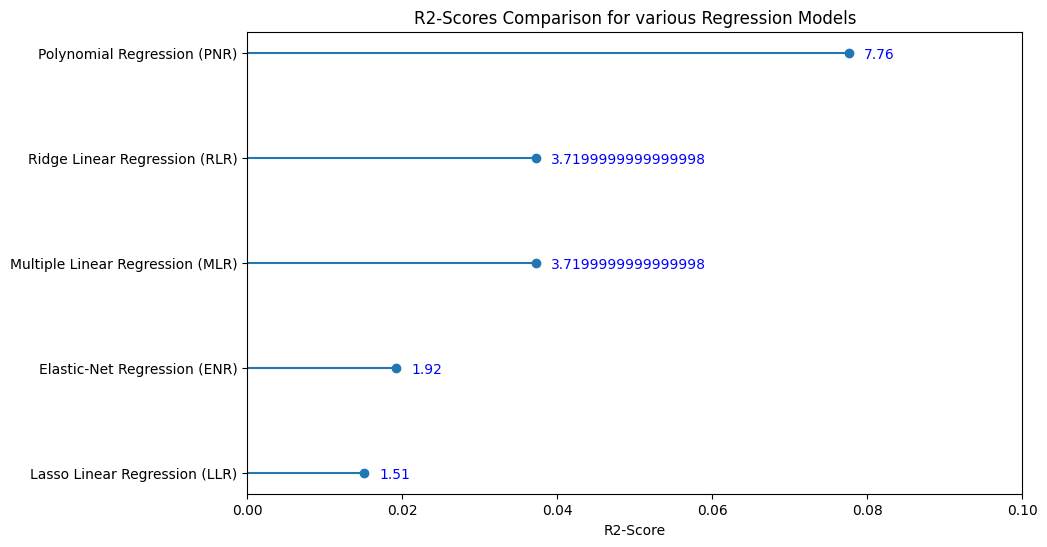

In [126]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.002, i-0.05, str(v*100), color='blue')
plt.xlim([0,0.1])
plt.show()